In [1]:
import re, os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path


def parse_block(block):
    pat = (r'chA:\s*(\d+)\s*chB:\s*(\d+).*?'
           r'MNR:\s*([\d.]+)\s*GNR:\s*([\d.]+)\s*DICE:\s*([\d.]+)')
    rows = re.findall(pat, block)
    df = pd.DataFrame(rows, columns=['chA','chB','MNR','GNR','DICE'])
    df = df.astype({'chA':int,'chB':int,'MNR':float,'GNR':float,'DICE':float})
    return df


def plot_metric(avg, channel_names, metric, ax):
    N = len(channel_names)
    # Generate upper/lower side masking
    upper_mask = np.triu(np.ones_like(avg, dtype=bool), 1)
    lower_mask = np.tril(np.ones_like(avg, dtype=bool), -1)

    # Masked the other side of the matrix
    upper = np.ma.masked_where(~upper_mask, 1 - avg)
    lower = np.ma.masked_where(~lower_mask,     avg)

    # Draw Masked Triangle Matrices
    im1 = ax.imshow(upper, cmap='Blues', vmin=0, vmax=1)
    im2 = ax.imshow(lower, cmap='Reds',  vmin=0, vmax=1)

    # Draw Text
    for i in range(N):
        for j in range(N):
            if i == j or np.isnan(avg[i,j]):    # Skip diagonal & empty
                continue
            txt = avg[i,j] if i > j else 1-avg[i,j]
            ax.text(j, i, f'{txt:.3f}', ha='center', va='center', fontsize=9)

    ax.set_xticks(range(N));  ax.set_yticks(range(N))
    ax.set_xticklabels(channel_names, rotation=45, ha='right')
    ax.set_yticklabels(channel_names)
    ax.set_title(metric)

    return im1, im2

def compute_avg_metrics(dfs, channel_names, metrics):
    id2pos = {cid: pos for pos, cid in enumerate(range(len(channel_names)))}
    N = len(channel_names)
    avg_vals = {m: np.full((N, N), np.nan) for m in metrics}

    for m in metrics:
        sums = np.zeros((N, N))
        counts = np.zeros((N, N))
        for df in dfs:
            for _, r in df.iterrows():
                if r.chA in id2pos and r.chB in id2pos:
                    i, j = id2pos[r.chA], id2pos[r.chB]
                    sums[i, j] += r[m]; sums[j, i] += r[m]
                    counts[i, j] += 1; counts[j, i] += 1
        avg = np.divide(sums, counts, out=np.full_like(sums, np.nan), where=counts > 0)
        np.fill_diagonal(avg, np.nan)
        avg_vals[m] = avg

    return avg_vals



In [3]:
channel_names = ['ORB','BRISK','AKAZE','KAZE','SIFT']  # 0‒4
metrics= ['MNR','GNR','DICE']

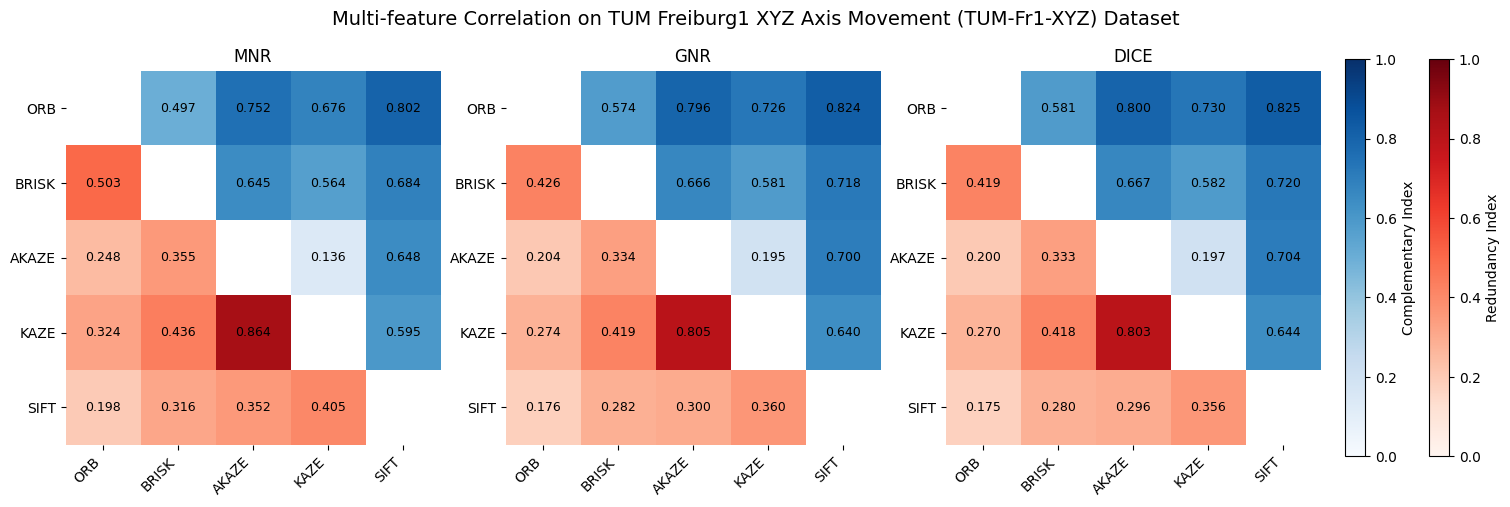

In [7]:
RAW_FILE = 'corr_exp_fr1xyz.txt'
OUT_DIR  = Path('ResultFigs')
OUT_DIR.mkdir(exist_ok=True)

with open(RAW_FILE, 'r', encoding='utf-8') as f:
    txt = f.read()

blocks = re.split(r'#\s*-+\s*\d+\s*Per-Channel Summary\s*-+\s*', txt)[1:]
dfs = [parse_block(b) for b in blocks]

avg_vals = compute_avg_metrics(dfs, channel_names, metrics)

ims_red = []
ims_blue = []
fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
for ax, m in zip(axes, ['MNR', 'GNR', 'DICE']):
    ax.grid(False)
    ax.set_frame_on(False)
    im1, im2 = plot_metric(avg_vals[m], channel_names, m, ax)
    ims_red.append(im2)
    ims_blue.append(im1)
cbar_red = fig.colorbar(ims_red[0], ax=axes.ravel().tolist(),
                         shrink=0.9, fraction=0.025, pad=0.01, label='Redundancy Index', orientation='vertical')
cbar_blue = fig.colorbar(ims_blue[0], ax=axes.ravel().tolist(),
                          shrink=0.9, fraction=0.025, pad=0.02, label='Complementary Index', orientation='vertical')

fig.suptitle('Multi-feature Correlation on TUM Freiburg1 XYZ Axis Movement (TUM-Fr1-XYZ) Dataset', fontsize=14)
fig.savefig(OUT_DIR/'corr_exp_fr1xyz.png', dpi=600)
plt.show()

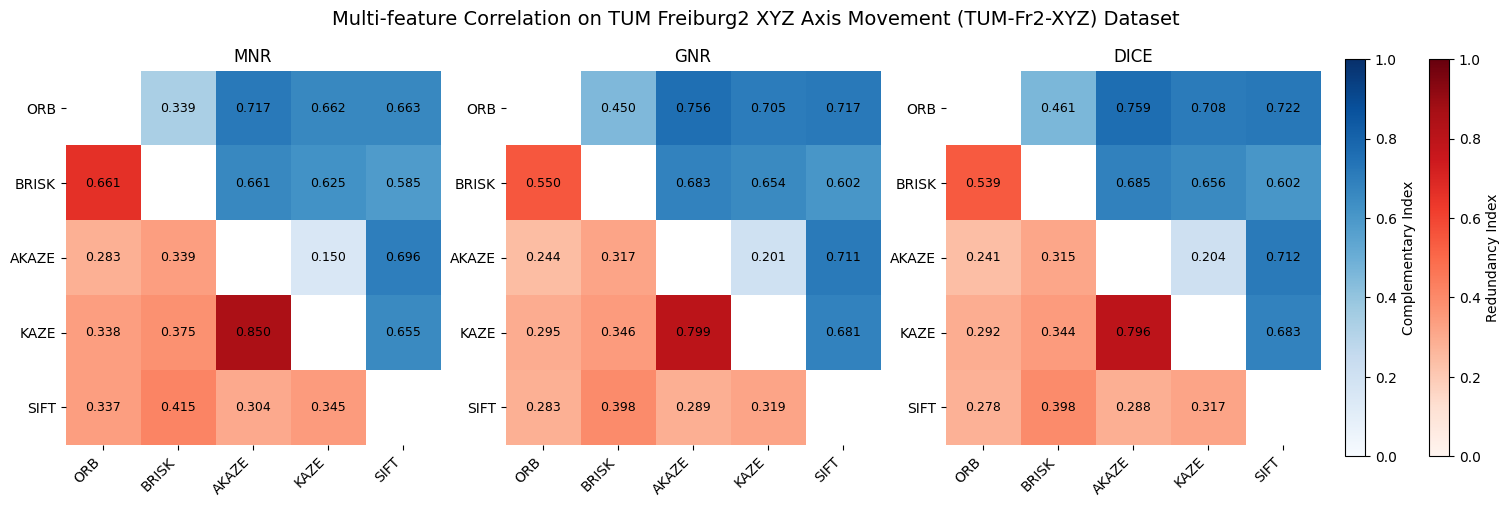

In [8]:
RAW_FILE = 'corr_exp_fr2xyz.txt'
OUT_DIR  = Path('ResultFigs')
OUT_DIR.mkdir(exist_ok=True)

with open(RAW_FILE, 'r', encoding='utf-8') as f:
    txt = f.read()

blocks = re.split(r'#\s*-+\s*\d+\s*Per-Channel Summary\s*-+\s*', txt)[1:]
dfs = [parse_block(b) for b in blocks]

avg_vals = compute_avg_metrics(dfs, channel_names, metrics)

ims_red = []
ims_blue = []
fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
for ax, m in zip(axes, ['MNR', 'GNR', 'DICE']):
    ax.grid(False)
    ax.set_frame_on(False)
    im1, im2 = plot_metric(avg_vals[m], channel_names, m, ax)
    ims_red.append(im2)
    ims_blue.append(im1)
cbar_red = fig.colorbar(ims_red[0], ax=axes.ravel().tolist(),
                         shrink=0.9, fraction=0.025, pad=0.01, label='Redundancy Index', orientation='vertical')
cbar_blue = fig.colorbar(ims_blue[0], ax=axes.ravel().tolist(),
                          shrink=0.9, fraction=0.025, pad=0.02, label='Complementary Index', orientation='vertical')

fig.suptitle('Multi-feature Correlation on TUM Freiburg2 XYZ Axis Movement (TUM-Fr2-XYZ) Dataset', fontsize=14)
fig.savefig(OUT_DIR/'corr_exp_fr2xyz.png', dpi=600)
plt.show()

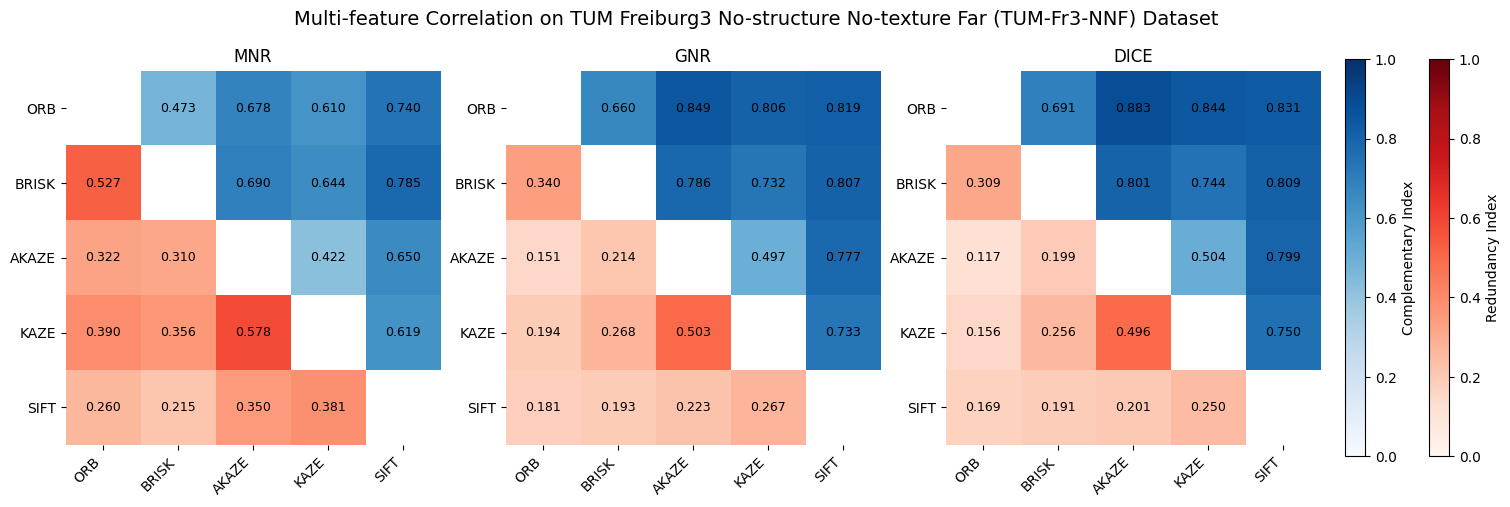

In [9]:
RAW_FILE = 'corr_exp_fr3nnf.txt'
OUT_DIR  = Path('ResultFigs')
OUT_DIR.mkdir(exist_ok=True)

with open(RAW_FILE, 'r', encoding='utf-8') as f:
    txt = f.read()

blocks = re.split(r'#\s*-+\s*\d+\s*Per-Channel Summary\s*-+\s*', txt)[1:]
dfs = [parse_block(b) for b in blocks]

avg_vals = compute_avg_metrics(dfs, channel_names, metrics)

ims_red = []
ims_blue = []
fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
for ax, m in zip(axes, ['MNR', 'GNR', 'DICE']):
    ax.grid(False)
    ax.set_frame_on(False)
    im1, im2 = plot_metric(avg_vals[m], channel_names, m, ax)
    ims_red.append(im2)
    ims_blue.append(im1)
cbar_red = fig.colorbar(ims_red[0], ax=axes.ravel().tolist(),
                         shrink=0.9, fraction=0.025, pad=0.01, label='Redundancy Index', orientation='vertical')
cbar_blue = fig.colorbar(ims_blue[0], ax=axes.ravel().tolist(),
                          shrink=0.9, fraction=0.025, pad=0.02, label='Complementary Index', orientation='vertical')

fig.suptitle('Multi-feature Correlation on TUM Freiburg3 No-structure No-texture Far (TUM-Fr3-NNF) Dataset', fontsize=14)
fig.savefig(OUT_DIR/'corr_exp_fr3nnf.png', dpi=600)
plt.show()
